In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### GEOMETRIC FUNCTIONS

In [13]:
# CYLINDER FUNCTION
def Cylinder(div=8, top_face_diam=1.0):
    cell_list = []
    point_list = []
    points = []
    
    for i in range(div):
        theta = float(i) / div * 2. * np.pi
        # print(i, theta)
        point_list.extend([[0, 0, 0], [0, np.cos(theta), np.sin(theta)]])

        points.extend([len(points), len(points) + 1])
    
    points.extend([0, 1])
    
    for i in range(div):
        theta = float(i) / div * 2. * np.pi
        point_list.extend([
            [0, np.cos(theta), np.sin(theta)],
            [1, np.cos(theta)*top_face_diam, np.sin(theta)*top_face_diam]])
        points.extend([div*2 + i*2, div*2 + 1 + i*2])
        
    points.extend([div*2, div*2 + 1])
    
    for i in range(div):
        theta = float(i) / div * 2. * np.pi
        point_list.extend([
            [1, 0, 0],
            [1, np.cos(theta)*top_face_diam, np.sin(theta)*top_face_diam]])
        points.extend([div*2*2 + i*2, div*2*2 + 1 + i*2])
    
    points.extend([div*2*2, div*2*2 + 1])
    
    return points, np.array(point_list)

In [3]:
def Cuboid():
    point_order = [0, 1, 2, 3, 4, 5, 6, 7]
    point_list = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                           [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])
    point_list = [v - [0.0, 0.5, 0.5] for v in point_list]

    return point_order, np.array(point_list)

In [4]:
# HEMISPHERE FUNCTION
def Hemisphere(div=10):
    cell_list = []
    point_list = []
    
    for i in range(int(div/2)+1):
        ph = np.pi * i / float(div)
        y = np.cos(ph)
        r = np.sin(ph)
        for j in range(div):
            th = 2.0 * np.pi * j / float(div)
            x = r * np.cos(th)
            z = r * np.sin(th)
            
            point_list.append([x, y, z])
    for i in range(int(div/2)):
        points = []
        for j in range(div):
            points.extend([i*div+j, (i+1)*div+j])
        points.extend([i*div, (i+1)*div])
        cell = {'type': 6, 'points': points}
        cell_list.append(cell)
    
    return cell_list, np.array(point_list)

In [5]:
# HEMISPHERE CYLINDER
def HemisphereCylinder(div=8, top_face_diam=1.0, height=1.0, radius=1.0):
    cell_list = []
    point_list = []
    point_start = 0
    
    for i in range(int(div/2)+1):
        ph = np.pi * i / float(div)
        y = np.cos(ph)
        r = np.sin(ph)
        print([i, ph, y, r])
        for j in range(div):
            th = 2.0 * np.pi * j / float(div)
            x = r * np.cos(th)
            z = r * np.sin(th)
            
            point_list.append([-y*radius, z*radius, x*radius])
            point_start += 1
    
    return point_list, point_start
    

In [6]:
# BASE SPHERE FUNCTION
def BaseSphere(div=10):
    cell_list = []
    point_list = []
    
    for i in range(div+1):
        ph = np.pi * i / float(div)
        y = np.cos(ph)
        r = np.sin(ph)
        for j in range(div):
            th = 2 * np.pi * j / float(div)
            x = r * np.cos(th)
            z = r * np.sin(th)
            
            point_list.append([x, y, z])
            # print([i, j, x, y, z])
    
    for i in range(div):
        points = []
        for j in range(div):
            points.extend([i * div+j, (i+1)*div+j])
            # print([i*div+j, (i+1)*div+j])
        points.extend([i * div, (i+1)*div])
        cell = {'type': 6, 'points': points}
        cell_list.append(cell)
    
    return cell_list, np.array(point_list)

In [15]:
# SPHERE
def Sphere(pos=(0,0,0), size=1.0, data=0.0, point_start=0):
    local_cell_list, local_point_list = BaseSphere()
    
    for cell in local_cell_list:
        cell['points'] = [i + point_start for i in cell['points']]
        cell['data'] = data
    
    # Scale
    local_point_list = np.array([v*[size, size, size] for v in local_point_list])
    
    # Translate
    local_point_list = np.array([v+pos for v in local_point_list])
    
    return local_cell_list, local_point_list

In [16]:
# LINE
def Line(pos1=(0,0,0), pos2=(0,0,0), data=0.0, point_start=0):
    local_cell_list = []
    local_point_list = np.array([pos1, pos2])
    cell = {'type':3, 'data':data, 'points':[0+point_start, 1+point_start]}
    local_cell_list.append(cell)
    
    return local_cell_list, local_point_list

### HELPER FUNCTIONS

In [17]:
def comparePoints(pts1, pts2):
    fig = plt.figure()
    # Plot just points 1 in the 1st axis
    ax = fig.add_subplot(131, projection='3d')
    ax.scatter(pts1[:, 0], pts1[:, 1], pts1[:, 2], 'b')
    ax.set_aspect('equal')
    # Plot just pts2 in the 2nd axis
    ax = fig.add_subplot(132, projection='3d')
    ax.scatter(pts2[:, 0], pts2[:, 1], pts2[:, 2], 'r')
    ax.set_aspect('equal')
    # Plot both pts1 and pts2 in the 3rd axes
    ax = fig.add_subplot(133, projection='3d')
    ax.scatter(pts1[:, 0], pts1[:, 1], pts1[:, 2], 'b')
    ax.scatter(pts2[:, 0], pts2[:, 1], pts2[:, 2], 'r')
    ax.set_aspect('equal')

Testing `Cylinder` function.

In [18]:
points, point_list = Cylinder()

0 0.0
1 0.7853981633974483
2 1.5707963267948966
3 2.356194490192345
4 3.141592653589793
5 3.9269908169872414
6 4.71238898038469
7 5.497787143782138


In [19]:
print(['number of points: ', len(point_list)])

['number of points: ', 48]


In [12]:
print(points)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 16, 17, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 32, 33]


In [90]:
# print(np.round(point_list, 4))

Testing `Hemisphere` function

In [87]:
hemi_celllist, hemi_pointlist = Hemisphere()

In [91]:
# print(hemi_pointlist)

In [9]:
# print(hemi_celllist)

Testing `Cuboid` function

In [93]:
point_order, point_list = Cuboid()

In [10]:
# print(point_order)

In [11]:
# print(point_list)

Testing `Line` function

In [89]:
[line_cell, line_pt] = Line()

In [90]:
print(line_cell)

[{'type': 3, 'data': 0.0, 'points': [0, 1]}]


In [91]:
print(line_pt)

[[0 0 0]
 [0 0 0]]


Testing `Sphere` function. Compare to parent function `BaseSphere`

In [38]:
[sphere_cells, sphere_points] = Sphere()
[base_cells, base_points] = BaseSphere()

In [39]:
print(len(sphere_cells))
print(len(base_cells))

10
10


In [ ]:
# With the default arguments, these points should be identical
# print(sphere_cells[0])
# print(base_cells[0])  # won't have data field

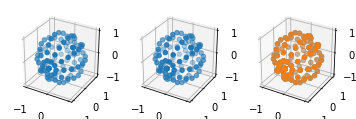

In [53]:
fig = plt.figure()
ax = fig.add_subplot(131, projection='3d')
ax.scatter(sphere_points[:,0], sphere_points[:,1], sphere_points[:,2], 'b')
ax.set_aspect('equal')
ax = fig.add_subplot(132, projection='3d')
ax.scatter(base_points[:, 0], base_points[:, 1], base_points[:, 2], 'r')
ax.set_aspect('equal')
ax = fig.add_subplot(133, projection='3d')
ax.scatter(sphere_points[:,0], sphere_points[:,1], sphere_points[:,2], 'b')
ax.scatter(base_points[:, 0], base_points[:, 1], base_points[:, 2], 'r')
ax.set_aspect('equal')

In [64]:
# Test point start
[sphere_cells, sphere_points] = Sphere(pos=(0, 0, 0), size=1.0, data=0.0, point_start=5)

In [65]:
print(sphere_cells[0])
print(base_cells[0])

{'type': 6, 'points': [5, 15, 6, 16, 7, 17, 8, 18, 9, 19, 10, 20, 11, 21, 12, 22, 13, 23, 14, 24, 5, 15], 'data': 0.0}
{'type': 6, 'points': [0, 10, 1, 11, 2, 12, 3, 13, 4, 14, 5, 15, 6, 16, 7, 17, 8, 18, 9, 19, 0, 10]}


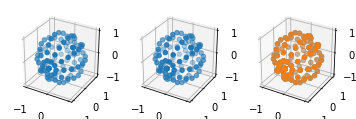

In [66]:
comparePoints(sphere_points, base_points)

Test **translating** the sphere with the `pos` argument

`cells, points = Sphere(pos=(5, 0, 0))`

In [69]:
[sphere_cells, sphere_points] = Sphere(pos=(5, 0, 0))

In [75]:
print(sphere_cells[0])
print(base_cells[0])

{'type': 6, 'points': [0, 10, 1, 11, 2, 12, 3, 13, 4, 14, 5, 15, 6, 16, 7, 17, 8, 18, 9, 19, 0, 10], 'data': 0.0}
{'type': 6, 'points': [0, 10, 1, 11, 2, 12, 3, 13, 4, 14, 5, 15, 6, 16, 7, 17, 8, 18, 9, 19, 0, 10]}


In [77]:
print(base_points[0:5,:])
print(sphere_points[0:5,:])

[[ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [-0.  1.  0.]
 [-0.  1.  0.]]
[[5. 1. 0.]
 [5. 1. 0.]
 [5. 1. 0.]
 [5. 1. 0.]
 [5. 1. 0.]]


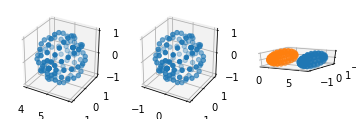

In [70]:
comparePoints(sphere_points, base_points)

Test **scaling** the sphere with `size` argument

`cells, points = Sphere(pos=(0,0,0), size=2)`

In [85]:
sphere_cells, sphere_points = Sphere(pos=(0,0,0), size=2)

In [86]:
print(sphere_cells[0])
print(base_cells[0])

{'type': 6, 'points': [0, 10, 1, 11, 2, 12, 3, 13, 4, 14, 5, 15, 6, 16, 7, 17, 8, 18, 9, 19, 0, 10], 'data': 0.0}
{'type': 6, 'points': [0, 10, 1, 11, 2, 12, 3, 13, 4, 14, 5, 15, 6, 16, 7, 17, 8, 18, 9, 19, 0, 10]}


In [87]:
print(base_points[0:5,:])
print(sphere_points[0:5,:])

[[ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [-0.  1.  0.]
 [-0.  1.  0.]]
[[0. 2. 0.]
 [0. 2. 0.]
 [0. 2. 0.]
 [0. 2. 0.]
 [0. 2. 0.]]


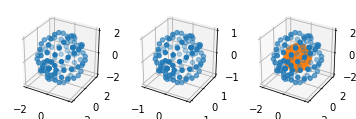

In [88]:
comparePoints(sphere_points, base_points)

Testing `HemisphereCylinder` function

In [19]:
hc_points, hc_pointstart = HemisphereCylinder()

[0, 0.0, 1.0, 0.0]
[1, 0.39269908169872414, 0.9238795325112867, 0.3826834323650898]
[2, 0.7853981633974483, 0.7071067811865476, 0.7071067811865475]
[3, 1.1780972450961724, 0.38268343236508984, 0.9238795325112867]
[4, 1.5707963267948966, 6.123233995736766e-17, 1.0]


In [20]:
print(np.pi/2)

1.5707963267948966
